In [2]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from tqdm import tqdm
import numpy as np
from PIL import Image
from csbdeep.utils import normalize
import tifffile as tiff
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize Training Logs

In [14]:
training="202508031212"

In [15]:
metrics = pd.read_parquet(f"pth/{training}/metrics.parquet")

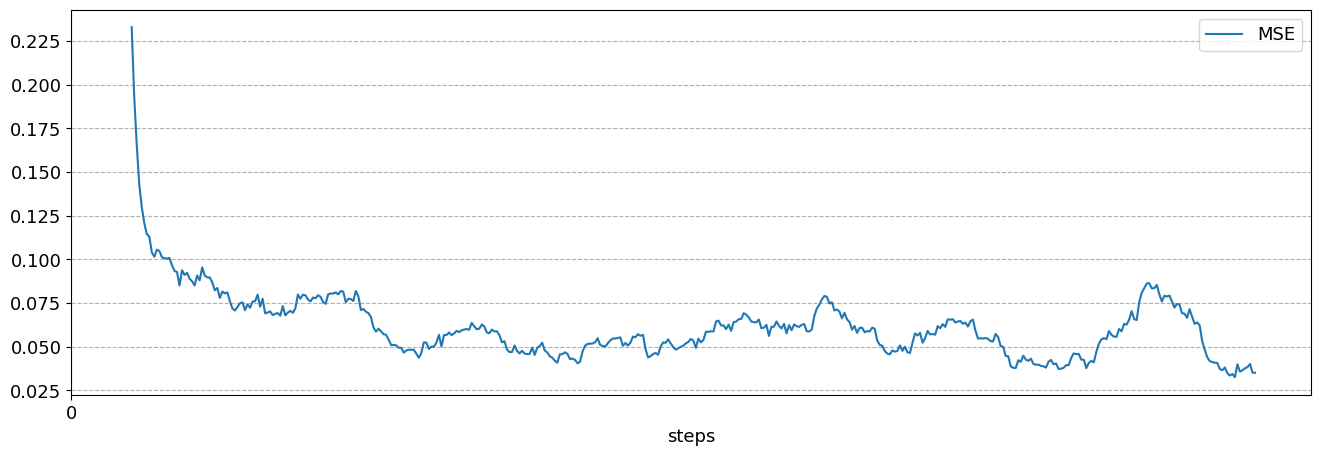

In [26]:
df = pd.DataFrame(
    {
        "steps": range(len(metrics)),
        "MSE": metrics['MSE'].rolling(25).mean(),
    }
)
ax = df.plot(x="steps", figsize=(16, 5))
ax.set_xticks(range(0, len(df), 2000));